In [118]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [119]:
#Importing data
data=pd.read_csv("C:/Users/DC/Downloads/AutoData.csv")
df=pd.DataFrame(data)
df

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
0     Bachelor           2/24/11         Employed  ...   
1     Bachelor           1/31/11       Unemployed  ...   
2     Bachelor           2/19/11         Employed  ...   
3     Bachelor           1/20/11       Unemployed  ...   
4     Bachelor            2/3/11         Employed  ...   
...        ...               ...              ...  ...   
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch      

In [120]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [121]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [122]:
df['Country'].unique()

array(['US'], dtype=object)

In [123]:
#Since country column only has US, it can be dropped. Customer column is an ID column which is irrelevant for analysis.State code is also unnecessary since state is already given.
df.drop(['Country'],axis=1,inplace=True)
df.drop(['Customer'],axis=1,inplace=True)
df.drop(['State Code'],axis=1,inplace=True)
df.drop(['Effective To Date'],axis=1,inplace=True)

In [124]:
df.columns

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [125]:
#Checking null values
df.isnull().sum()

State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [126]:
#LabelEncoder to change object variables to int
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=le.fit_transform(df[i].astype(str))
df

State  Claim Amount  Response  Coverage  Education  EmploymentStatus  \
0         1    276.351928         0         0          0                 1   
1         3    697.953590         0         1          0                 4   
2         4   1288.743165         0         2          0                 1   
3         2    764.586183         0         0          0                 4   
4         1    281.369258         0         0          0                 1   
...     ...           ...       ...       ...        ...               ...   
9129      2   2340.598798         0         0          0                 1   
9130      2    309.651122         1         1          1                 1   
9131      2    816.389043         0         1          0                 4   
9132      2    752.444244         0         1          1                 1   
9133      2    261.183687         0         1          1                 4   

      Gender  Income  Location Code  Marital Status  ...  \
0          0   56274              1               1  ...   
1          0       0              1               2  ...   
2          0   48767              1               1  ...   
3          1       0              1               1  ...   
4          1   43836              0               2  ...   
...      ...     ...            ...             ...  ...   
9129       1   71941              2               1  ...   
9130       0   21604              1               0  ...   
9131       1       0              1               2  ...   
9132       1   21941              1               1  ...   
9133       1       0              1               2  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      1            0       2             0              0   
1                      8            1       5             3              0   
2                      2            1       5             0              0   
3                      7            0       1             0              2   
4                      1            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   2            1       3             1              3   
9130                   1            0       2             0              1   
9131                   2            0       1             0              1   
9132                   3            1       4             3              1   
9133                   1            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.200000              0             0  
91

In [127]:
df.describe()

State  Claim Amount     Response     Coverage    Education  \
count  9134.000000   9134.000000  9134.000000  9134.000000  9134.000000   
mean      1.722684    800.494047     0.143201     0.480622     1.554084   
std       1.312397    687.096761     0.350297     0.655817     1.381978   
min       0.000000    189.800768     0.000000     0.000000     0.000000   
25%       0.000000    399.425179     0.000000     0.000000     0.000000   
50%       2.000000    578.018220     0.000000     0.000000     1.000000   
75%       3.000000    896.216704     0.000000     1.000000     3.000000   
max       4.000000   8332.538119     1.000000     2.000000     4.000000   

       EmploymentStatus       Gender        Income  Location Code  \
count       9134.000000  9134.000000   9134.000000    9134.000000   
mean           1.825706     0.490037  37657.380009       0.979089   
std            1.347793     0.499928  30379.904734       0.605732   
min            0.000000     0.000000      0.000000       0.000000   
25%            1.000000     0.000000      0.000000       1.000000   
50%            1.000000     0.000000  33889.500000       1.000000   
75%            4.000000     1.000000  62320.000000       1.000000   
max            4.000000     1.000000  99981.000000       2.000000   

       Marital Status  ...  Months Since Policy Inception  \
count     9134.000000  ...                    9134.000000   
mean         1.120210  ...                      48.064594   
std          0.636838  ...                      27.905991   
min          0.000000  ...                       0.000000   
25%          1.000000  ...                      24.000000   
50%          1.000000  ...                      48.000000   
75%          2.000000  ...                      71.000000   
max          2.000000  ...                      99.000000   

       Number of Open Complaints  Number of Policies  Policy Type  \
count                9134.000000         9134.000000  9134.000000   
mean                    0.384388            2.966170     0.825925   
std                     0.910384            2.390182     0.475989   
min                     0.000000            1.000000     0.000000   
25%                     0.000000            1.000000     1.000000   
50%                     0.000000            2.000000     1.000000   
75%                     0.000000            4.000000     1.000000   
max                     5.000000            9.000000     2.000000   

            Policy  Claim Reason  Sales Channel  Total Claim Amount  \
count  9134.000000   9134.000000    9134.000000         9134.000000   
mean      3.797788      1.014889       1.102693          434.088794   
std       1.605978      1.072331       1.069452          290.500092   
min       0.000000      0.000000       0.000000            0.099007   
25%       3.000000      0.000000       0.000000          272.258244   
50%       4.000000      1.000000       1.000000          383.945434   
75%       5.000000      2.000000       2.000000          547.514839   
max       8.000000      3.000000       3.000000         2893.239678   

       Vehicle Class  Vehicle Size  
count    9134.000000   9134.000000  
mean        1.892380      1.089556  
std         2.072992      0.537313  
min         0.000000      0.000000  
25%         0.000000      1.000000  
50%         0.000000      1.000000  
75%         4.000000      1.000000  
max         5.000000      2.000000  

[8 rows x 22 columns]

Clearly skewness and outliers are present in some of the columns

In [128]:
#Outliers check and treatment 
from scipy.stats import zscore 
threhold=3 
z=np.abs(zscore(df)) 
print(np.where(z>3))

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1046, 1046, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1133,
       1158, 1174, 1179, 1184, 1200, 1212, 1233, 1240, 1283, 1292, 1292,
       1300, 1305, 1312, 1312, 1319, 1330, 1364, 1382, 1383, 1383, 1384,
       1392, 1393, 1408, 1421, 1429, 1436, 1466, 1504, 1506, 1516, 1516,
       1521, 1529, 1534, 1541, 1552, 1552, 1555, 1558, 1592, 1626, 1640,
       1657, 1687, 1795, 1796, 1796, 1809, 1812, 1819, 1819, 1823, 1824,
       1850, 1858, 1858, 1859, 1861, 1881, 1881, 1

In [129]:
df=df[(z<3).all(axis=1)]
df

State  Claim Amount  Response  Coverage  Education  EmploymentStatus  \
0         1    276.351928         0         0          0                 1   
1         3    697.953590         0         1          0                 4   
2         4   1288.743165         0         2          0                 1   
3         2    764.586183         0         0          0                 4   
4         1    281.369258         0         0          0                 1   
...     ...           ...       ...       ...        ...               ...   
9129      2   2340.598798         0         0          0                 1   
9130      2    309.651122         1         1          1                 1   
9131      2    816.389043         0         1          0                 4   
9132      2    752.444244         0         1          1                 1   
9133      2    261.183687         0         1          1                 4   

      Gender  Income  Location Code  Marital Status  ...  \
0          0   56274              1               1  ...   
1          0       0              1               2  ...   
2          0   48767              1               1  ...   
3          1       0              1               1  ...   
4          1   43836              0               2  ...   
...      ...     ...            ...             ...  ...   
9129       1   71941              2               1  ...   
9130       0   21604              1               0  ...   
9131       1       0              1               2  ...   
9132       1   21941              1               1  ...   
9133       1       0              1               2  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      1            0       2             0              0   
1                      8            1       5             3              0   
2                      2            1       5             0              0   
3                      7            0       1             0              2   
4                      1            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   2            1       3             1              3   
9130                   1            0       2             0              1   
9131                   2            0       1             0              1   
9132                   3            1       4             3              1   
9133                   1            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.200000              0             0  
91

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#Correlation
df.corr()

State  Claim Amount  Response  Coverage  \
State                          1.000000     -0.013644 -0.002620  0.013792   
Claim Amount                  -0.013644      1.000000  0.016126  0.145892   
Response                      -0.002620      0.016126  1.000000 -0.008043   
Coverage                       0.013792      0.145892 -0.008043  1.000000   
Education                      0.007384      0.012958  0.006542  0.020977   
EmploymentStatus               0.000959     -0.032306 -0.011690 -0.000708   
Gender                        -0.001724     -0.011765  0.015157 -0.014909   
Income                         0.000878      0.027014  0.013171 -0.008868   
Location Code                 -0.000077      0.000165  0.002064 -0.020078   
Marital Status                -0.006616     -0.029772 -0.079423 -0.000735   
Monthly Premium Auto           0.004380      0.300491  0.002730  0.490542   
Months Since Last Claim        0.007619      0.004811 -0.024905  0.006324   
Months Since Policy Inception -0.006412     -0.015509 -0.010857  0.007431   
Number of Open Complaints      0.019704     -0.020523 -0.021972 -0.004958   
Number of Policies            -0.008185      0.073200 -0.017475 -0.009903   
Policy Type                   -0.008292      0.015163 -0.000504 -0.001743   
Policy                        -0.013297      0.011649 -0.004152 -0.007716   
Claim Reason                   0.005558     -0.051442 -0.157340 -0.034485   
Sales Channel                  0.000664     -0.016131 -0.082354 -0.019081   
Total Claim Amount             0.004712      0.117341  0.025965  0.264402   
Vehicle Class                 -0.005447      0.076809  0.025832 -0.018903   
Vehicle Size                  -0.001443      0.003184 -0.055123 -0.013545   

                               Education  EmploymentStatus    Gender  \
State                           0.007384          0.000959 -0.001724   
Claim Amount                    0.012958         -0.032306 -0.011765   
Response                        0.006542         -0.011690  0.015157   
Coverage                        0.020977         -0.000708 -0.014909   
Education                       1.000000         -0.022486  0.001048   
EmploymentStatus               -0.022486          1.000000  0.031341   
Gender                          0.001048          0.031341  1.000000   
Income                          0.017016         -0.723112 -0.010147   
Location Code                  -0.015903          0.015170  0.002068   
Marital Status                  0.003817          0.305929  0.027457   
Monthly Premium Auto            0.024959         -0.011268 -0.007829   
Months Since Last Claim         0.000242          0.010400  0.026124   
Months Since Policy Inception   0.006695          0.014443  0.003434   
Number of Open Complaints      -0.020794          0.009691 -0.008954   
Number of Policies              0.002983          0.005384  0.020260   
Policy Type                     0.016969         -0.000927 -0.002108   
Policy                          0.015148         -0.000123 -0.000988   
Claim Reason                    0.049375         -0.101833  0.031761   
Sales Channel                  -0.001515         -0.016760 -0.020444   
Total Claim Amount              0.021347          0.355467  0.067461   
Vehicle Class                   0.011328         -0.002189  0.020086   
Vehicle Size                   -0.007451         -0.010124 -0.000141   

                                 Income  Location Code  Marital Status  ...  \
State                          0.000878      -0.000077       -0.006616  ...   
Claim Amount                   0.027014       0.000165       -0.029772  ...   
Response                       0.013171       0.002064       -0.079423  ...   
Coverage                      -0.008868      -0.020078       -0.000735  ...   
Education                      0.017016      -0.015903        0.003817  ...   
EmploymentStatus              -0.723112       0.015170        0.305929  ...   
Gender                        -0.010147       0.0020

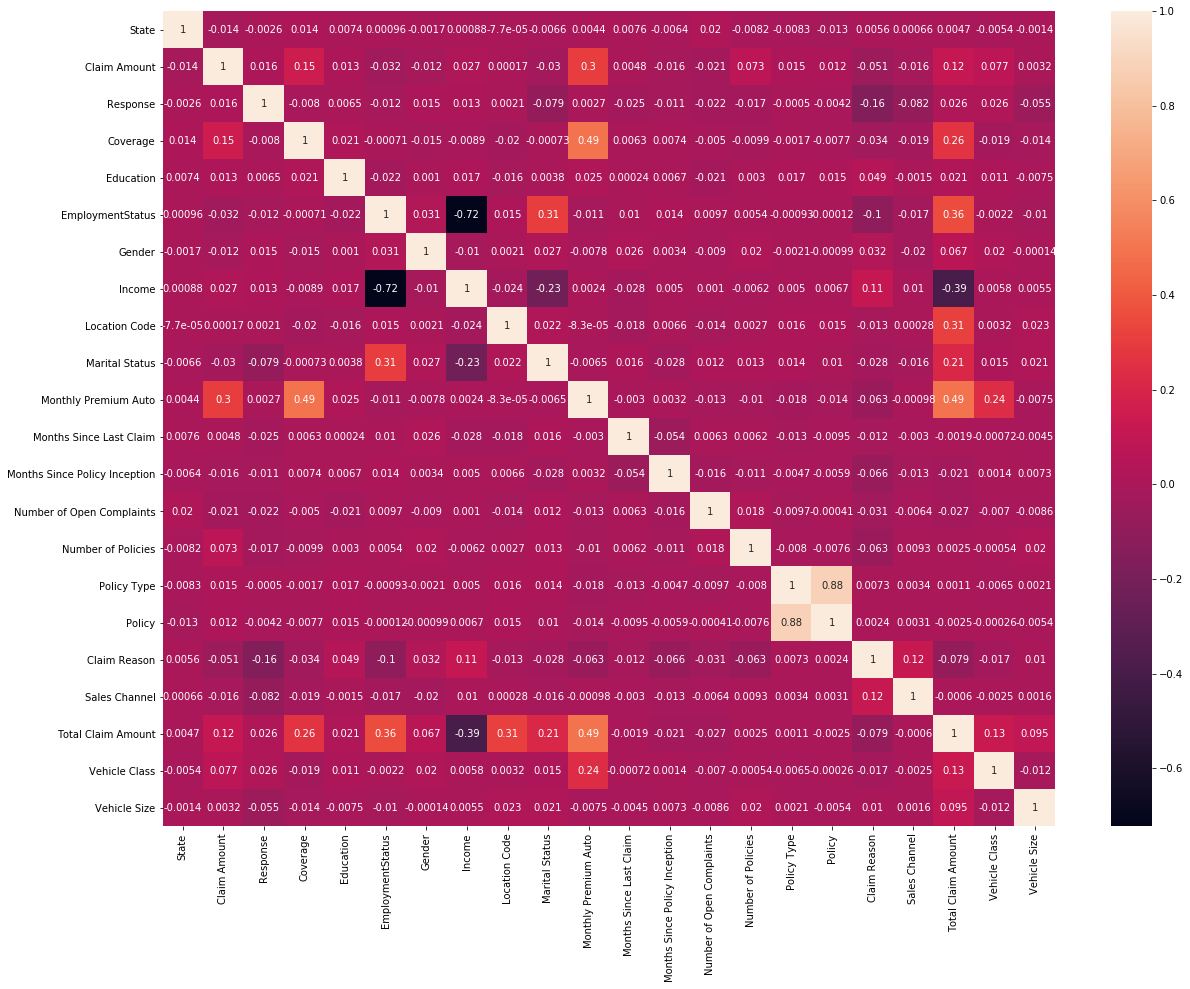

In [132]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

no significant correlation found except income and employment status has negetive correlation

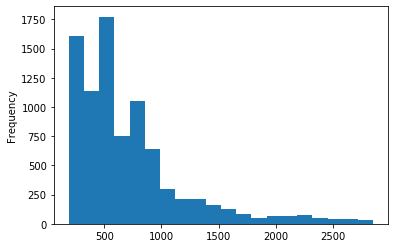

In [133]:
plt.figure()
df['Claim Amount'].plot(kind='hist',bins=20)

claim amount=500(approx) has the highest frequency

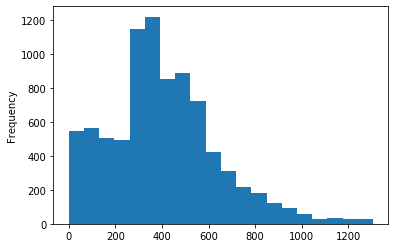

In [134]:
plt.figure()
df['Total Claim Amount'].plot(kind='hist',bins=20)

Total claim amount=350(approx)has the highest frequency

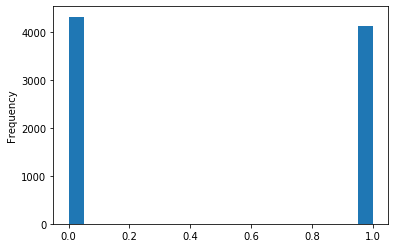

In [135]:
plt.figure()
df['Gender'].plot(kind='hist',bins=20)

Gender 0 has the highest frequency

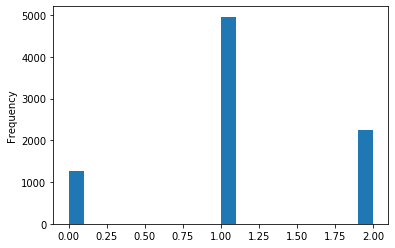

In [136]:
plt.figure()
df['Marital Status'].plot(kind='hist',bins=20)

Marital status=1 has the highest frequency

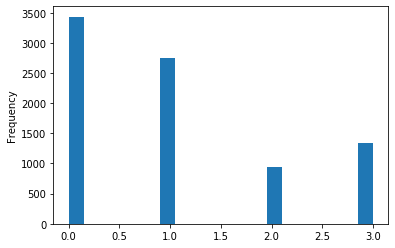

In [137]:
plt.figure()
df['Claim Reason'].plot(kind='hist',bins=20)

Claim reason=0 has the highest frequency

<Figure size 432x288 with 0 Axes>

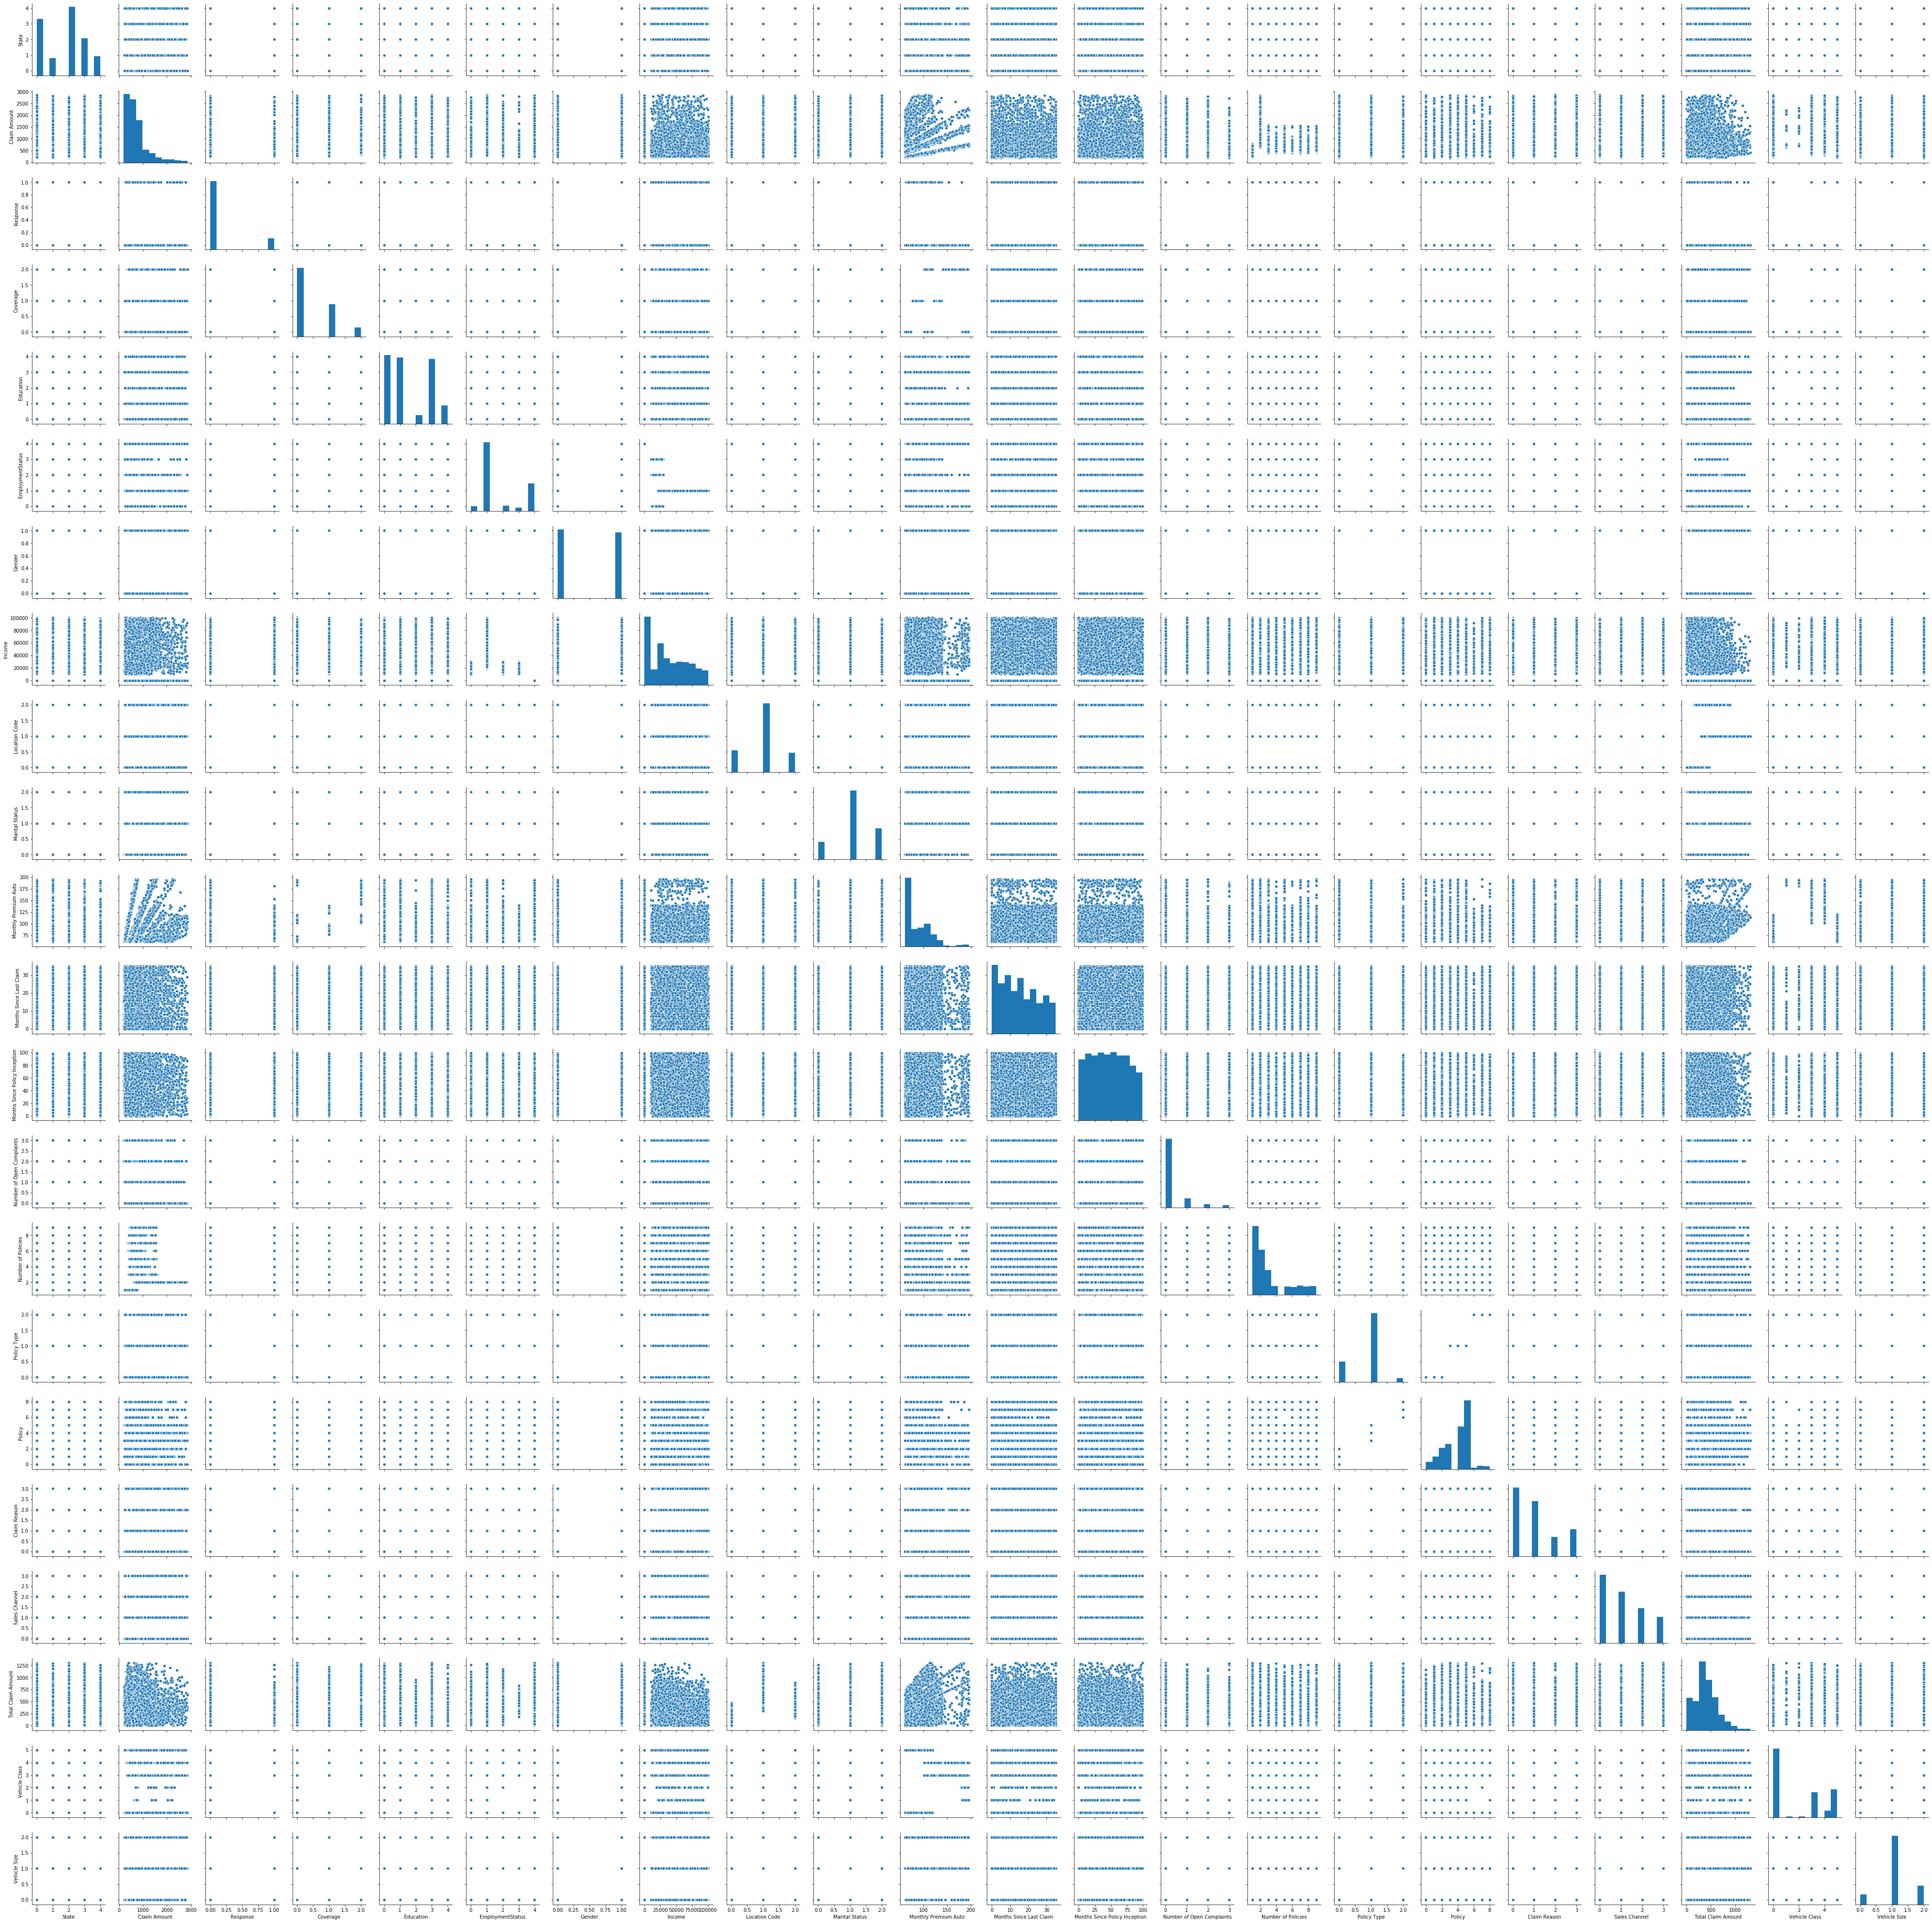

In [138]:
plt.figure()
sns.pairplot(df)

In [139]:
#Modifying column names(removing white spaces)
df.columns=df.columns.str.replace(' ','_')
df

State  Claim_Amount  Response  Coverage  Education  EmploymentStatus  \
0         1    276.351928         0         0          0                 1   
1         3    697.953590         0         1          0                 4   
2         4   1288.743165         0         2          0                 1   
3         2    764.586183         0         0          0                 4   
4         1    281.369258         0         0          0                 1   
...     ...           ...       ...       ...        ...               ...   
9129      2   2340.598798         0         0          0                 1   
9130      2    309.651122         1         1          1                 1   
9131      2    816.389043         0         1          0                 4   
9132      2    752.444244         0         1          1                 1   
9133      2    261.183687         0         1          1                 4   

      Gender  Income  Location_Code  Marital_Status  ...  \
0          0   56274              1               1  ...   
1          0       0              1               2  ...   
2          0   48767              1               1  ...   
3          1       0              1               1  ...   
4          1   43836              0               2  ...   
...      ...     ...            ...             ...  ...   
9129       1   71941              2               1  ...   
9130       0   21604              1               0  ...   
9131       1       0              1               2  ...   
9132       1   21941              1               1  ...   
9133       1       0              1               2  ...   

      Months_Since_Policy_Inception  Number_of_Open_Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number_of_Policies  Policy_Type  Policy  Claim_Reason  Sales_Channel  \
0                      1            0       2             0              0   
1                      8            1       5             3              0   
2                      2            1       5             0              0   
3                      7            0       1             0              2   
4                      1            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   2            1       3             1              3   
9130                   1            0       2             0              1   
9131                   2            0       1             0              1   
9132                   3            1       4             3              1   
9133                   1            0       2             2              2   

      Total_Claim_Amount  Vehicle_Class  Vehicle_Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.200000              0             0  
91

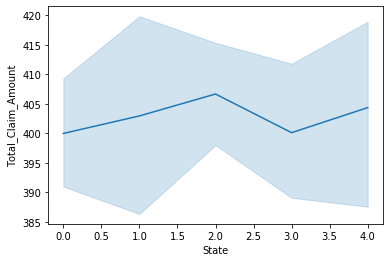

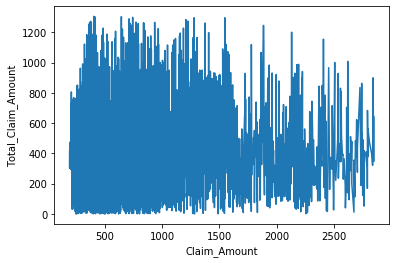

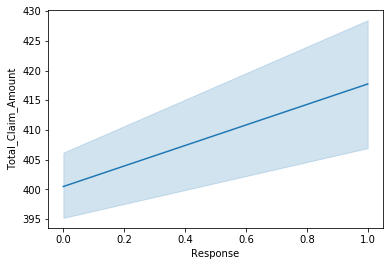

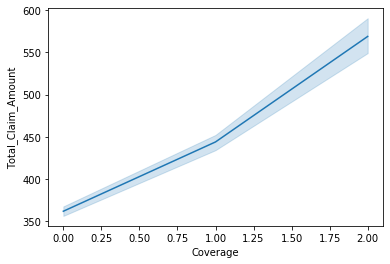

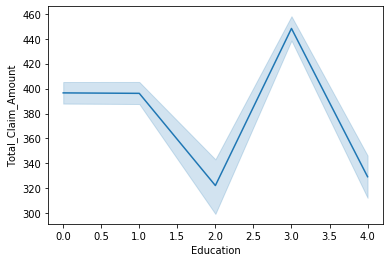

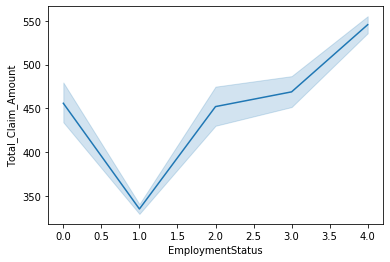

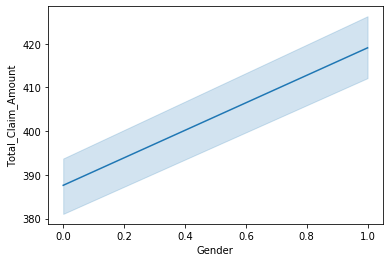

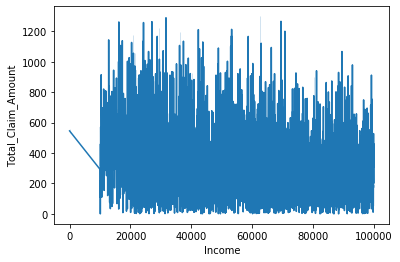

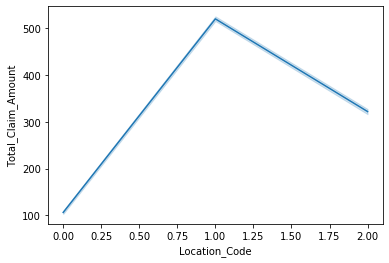

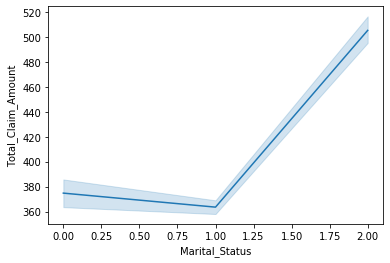

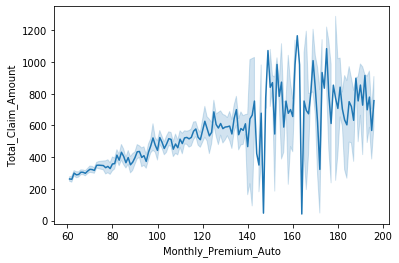

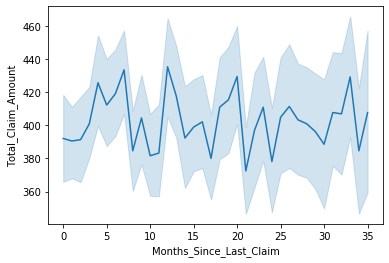

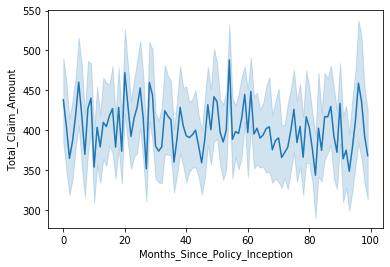

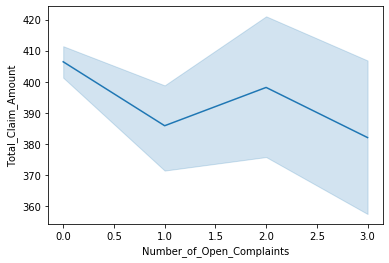

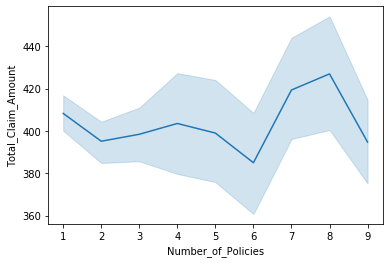

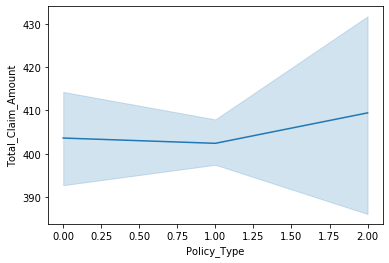

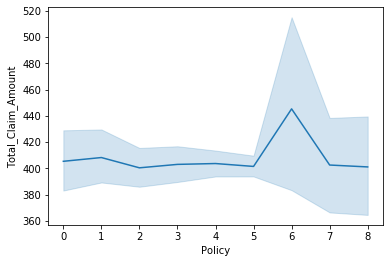

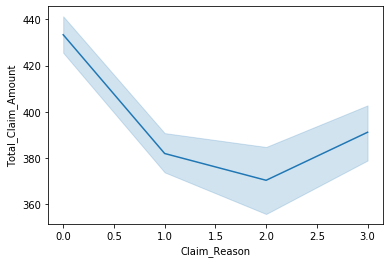

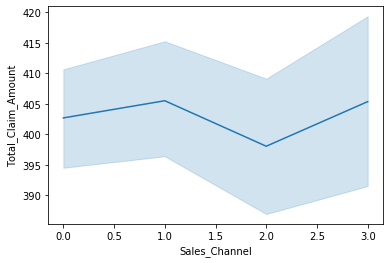

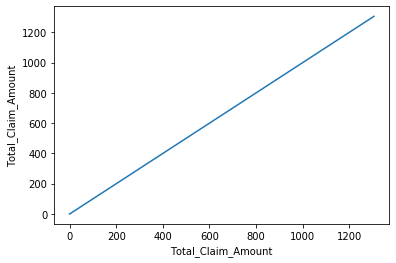

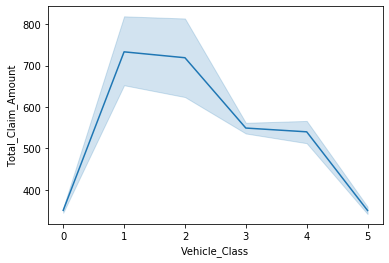

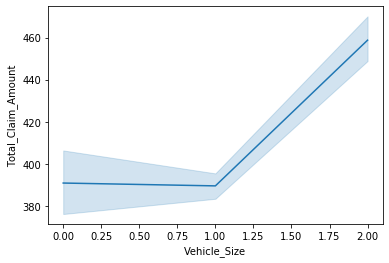

In [140]:
for i in df.columns:
    plt.figure()
    sns.lineplot(i,'Total_Claim_Amount',data=df)

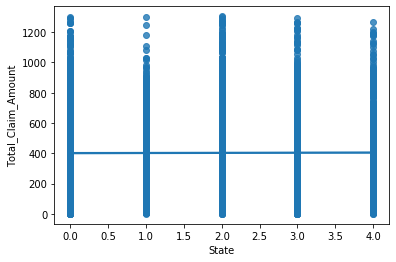

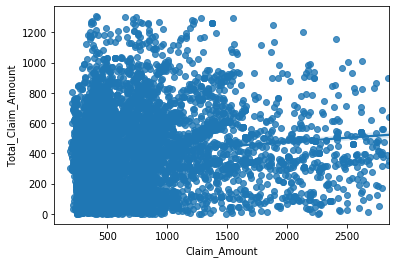

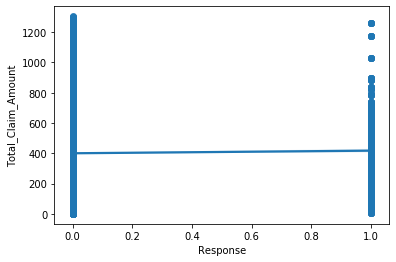

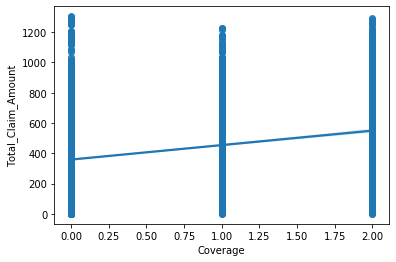

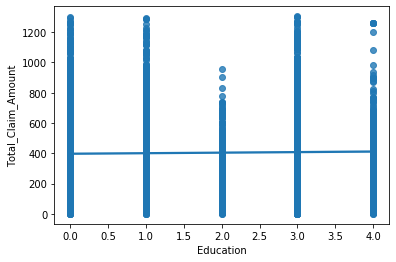

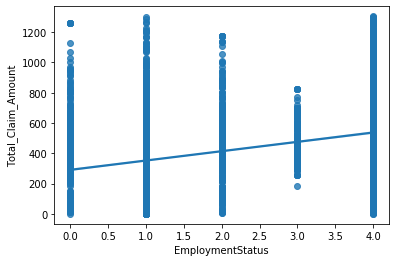

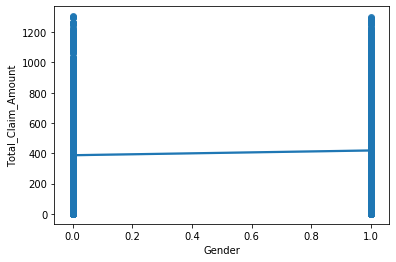

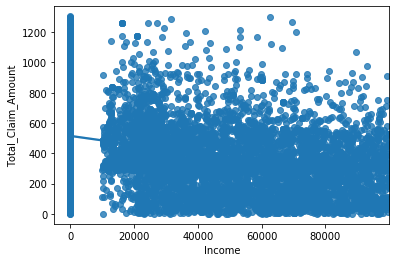

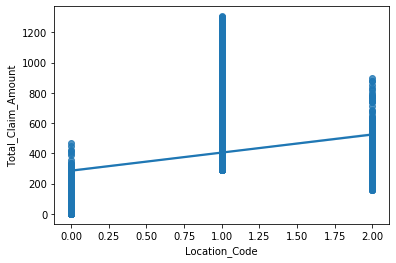

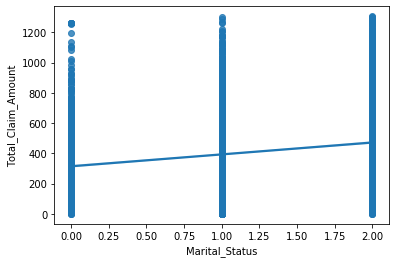

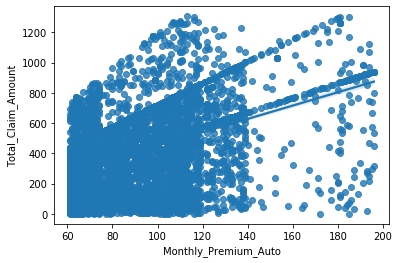

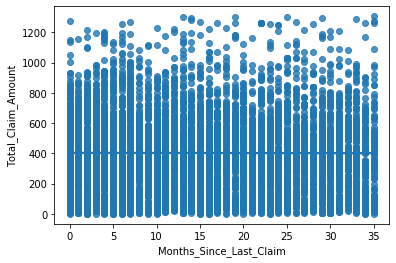

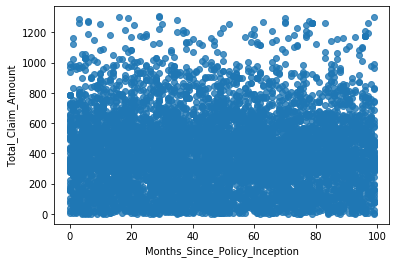

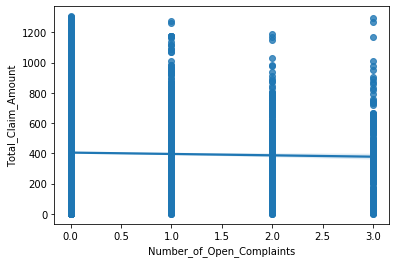

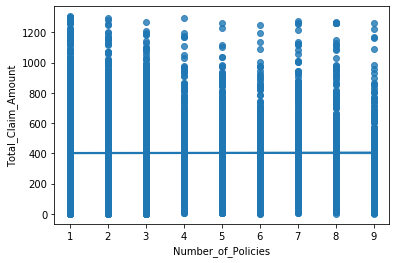

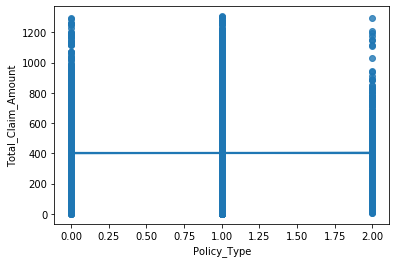

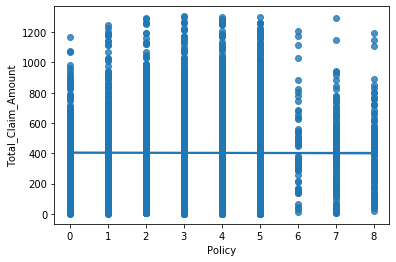

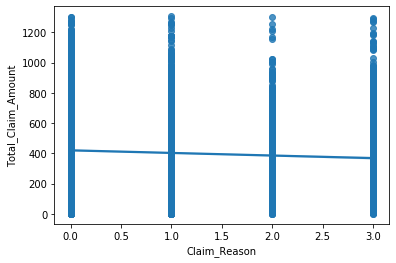

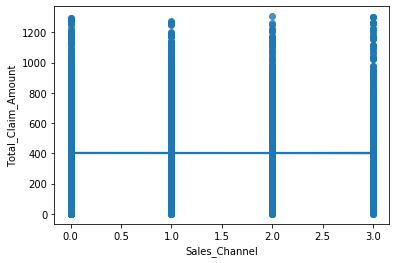

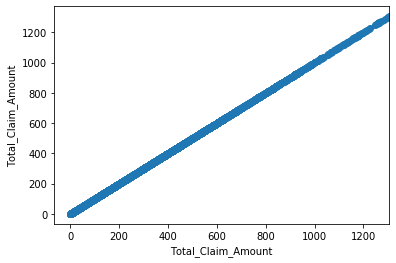

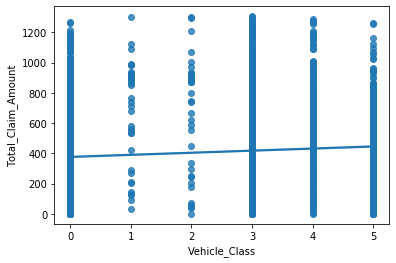

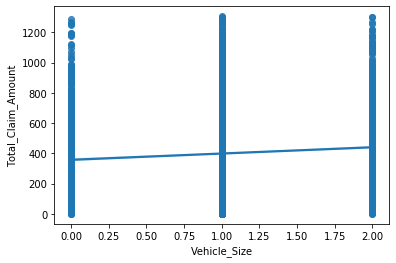

In [141]:
for i in df.columns:
    plt.figure()
    sns.regplot(i,'Total_Claim_Amount',data=df)

State 2 has the highest claim amount and 3 has the lowest. Total claim amount increases with increase in claim amount.Response 1 has the highest claim amount.Coverage 2 has the highest claim amount and 0 has the lowest.Education 3 has the highest claim amount and 2 has the lowest.Employment status 4 has the highest claim amount and 1 has the lowest.Gender 1 has the highest claim amount.Total claim amount reduces with increase in income.Location code 1 has the highest claim amount and 0 has the lowest.Marital status 2 has the highest claim amount and 1 has the lowest.Total claim amount increses with increase in monthly premium auto.Claim amount increases slightly with increase in months since last claim. total claim amount decreases with increase in months since policy inception.Number of open complaints 0 has the highest claim amount and 3 has the lowest. No of policies 8 has the highest claim amount and 6 has the lowest. Policy type 2 has the highest claim amount and 1 has the lowest. Policy has the highest claim amount and 8 has the lowest. Claim resason 0 has the highest claim amount and 2 has the lowest. Sales channel 1 has the highest claim amount and 2 has the lowest. Vehicle class 1 has the highest claim amount and 0,5 has the lowest. Vehicle size 2 has the highest claim amount and 1 has the lowest

In [144]:
#X y division of data
x=df.drop(['Total_Claim_Amount'],axis=1)
y=df['Total_Claim_Amount']
y=y.values.reshape(-1,1)
y.shape

(8470, 1)

In [145]:
#scaling the data
import sklearn
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dx=scale.fit_transform(x)
x=pd.DataFrame(dx,columns=x.columns)
x

State  Claim_Amount  Response  Coverage  Education  EmploymentStatus  \
0    -0.551121     -0.902330 -0.409822 -0.715334  -1.120269         -0.607891   
1     0.974119     -0.034509 -0.409822  0.836633  -1.120269          1.625231   
2     1.736738      1.181567 -0.409822  2.388599  -1.120269         -0.607891   
3     0.211499      0.102647 -0.409822 -0.715334  -1.120269          1.625231   
4    -0.551121     -0.892003 -0.409822 -0.715334  -1.120269         -0.607891   
...        ...           ...       ...       ...        ...               ...   
8465  0.211499      3.346697 -0.409822 -0.715334  -1.120269         -0.607891   
8466  0.211499     -0.833787  2.440087  0.836633  -0.397212         -0.607891   
8467  0.211499      0.209277 -0.409822  0.836633  -1.120269          1.625231   
8468  0.211499      0.077654 -0.409822  0.836633  -0.397212         -0.607891   
8469  0.211499     -0.933552 -0.409822  0.836633  -0.397212          1.625231   

        Gender    Income  Location_Code  Marital_Status  ...  \
0    -0.978045  0.604143       0.037243       -0.186015  ...   
1    -0.978045 -1.244638       0.037243        1.394274  ...   
2    -0.978045  0.357514       0.037243       -0.186015  ...   
3     1.022448 -1.244638       0.037243       -0.186015  ...   
4     1.022448  0.195515      -1.597204        1.394274  ...   
...        ...       ...            ...             ...  ...   
8465  1.022448  1.118854       1.671690       -0.186015  ...   
8466 -0.978045 -0.534877       0.037243       -1.766304  ...   
8467  1.022448 -1.244638       0.037243        1.394274  ...   
8468  1.022448 -0.523806       0.037243       -0.186015  ...   
8469  1.022448 -1.244638       0.037243        1.394274  ...   

      Months_Since_Last_Claim  Months_Since_Policy_Inception  \
0                    1.683302                      -1.535241   
1                   -0.204683                      -0.208285   
2                    0.292155                      -0.351739   
3                    0.292155                       0.616580   
4                   -0.304051                      -0.136557   
...                       ...                            ...   
8465                 0.292155                       1.477309   
8466                -0.105316                      -0.710376   
8467                -0.602154                      -0.387603   
8468                 1.882037                      -1.606969   
8469                -1.198360                       1.513173   

      Number_of_Open_Complaints  Number_of_Policies  Policy_Type    Policy  \
0                     -0.421328           -0.824388    -1.717870 -1.109423   
1                     -0.421328            2.076038     0.372999  0.755394   
2                     -0.421328           -0.410042     0.372999  0.755394   
3                     -0.421328            1.661691    -1.717870 -1.731029   
4                     -0.421328           -0.824388     0.372999 -0.487818   
...                         ...                 ...          ...       ...   
8465                  -0.421328           -0.410042     0.372999 -0.487818   
8466                  -0.421328           -0.824388    -1.717870 -1.109423   
8467                   3.885167           -0.410042    -1.717870 -1.731029   
8468                  -0.421328            0.004305     0.372999  0.133788   
8469                  -0.421328           -0.824388    -1.717870 -1.109423   

      Claim_Reason  Sales_Channel  Vehicle_Class  Vehicle_Size  
0        -0.954020      -1.035286       1.478254     -0.162023  
1         1.845892      -1.035286      -0.892124     -0.162023  
2        -0.954020      -1.035286       1.478254     -0.162023  
3        -0.954020       0.836205       0.530103     -0.162023  
4        -0.954020      -1.035286      -0.892124     -0.162023  
...            ...            ...            ...           ...  
8465     -0.020716       1.771950      -0.892124     -0.162023  
8466     -0.954020      -0.099540      -0

In [146]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [147]:
#Calculating best r score
def max_score(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        r2=r2_score(ytest,ypred)
        if r2>max_score:
            max_score=r2
            final_r_state=r_state
    print(max_score,'is max accuracy against r_state',final_r_state)

In [148]:
lr=LinearRegression()
max_score(lr)

0.5598435225634595 is max accuracy against r_state 96


In [149]:
from sklearn.svm import SVR
para={'kernel':['rbf','linear','poly']}
grid=GridSearchCV(estimator=SVR(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'kernel': 'linear'}


In [150]:
svr=SVR(kernel='linear')
max_score(svr)

0.5560913432055024 is max accuracy against r_state 96


In [151]:
from sklearn.neighbors import KNeighborsRegressor
#Knr
n_neighbors={'n_neighbors':[3,5,7,9,11]}
grid=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=n_neighbors)
grid.fit(x,y)
print(grid.best_params_)

{'n_neighbors': 7}


In [152]:
knr=KNeighborsRegressor(n_neighbors=7)
max_score(knr)

0.689486391293159 is max accuracy against r_state 79


In [153]:
from sklearn.tree import DecisionTreeRegressor
para={'criterion':['mse','mae','friedman_mse']}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'criterion': 'friedman_mse'}


In [154]:
dtr=DecisionTreeRegressor(criterion='friedman_mse')
max_score(dtr)

0.7025334689559939 is max accuracy against r_state 66


In [155]:
import xgboost
from xgboost import XGBRegressor

In [156]:
xgbr=XGBRegressor()
max_score(xgbr)

0.8349109736899938 is max accuracy against r_state 79


In [157]:
from sklearn.ensemble import GradientBoostingRegressor
para={'n_estimators':[100,200,300,500],'learning_rate':[1,0.1,0.01,0.001]}
grid=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 300}


In [158]:
gdr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=300)
max_score(gdr)

0.8432096967991699 is max accuracy against r_state 81


In [159]:
from sklearn.ensemble import RandomForestRegressor
para={'n_estimators':[100,200,300,500]}
grid=GridSearchCV(estimator=RandomForestRegressor(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'n_estimators': 200}


In [160]:
rfr=RandomForestRegressor(n_estimators=200)
max_score(rfr)

0.8483951589431564 is max accuracy against r_state 81


In [161]:
models=[]
models.append(('Linear Regression',lr,96))
models.append(('Support Vector Regressor',svr,96))
models.append(('KNeighborsRegressor',knr,79))
models.append(('DecisionTreeRegressor',dtr,66))
models.append(('XGBoostRegressor',xgbr,79))
models.append(('GradientBoostingRegressor',gdr,81))
models.append(('RandomForestRegressor',rfr,81))

Model=[]
R2Score=[]
Cvs=[]
MAE=[]
MSE=[]
RMSE=[]

In [162]:
for name,model,randomstate in models:
    print('***********',name,'************')
    print('\n')
    Model.append(name)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=randomstate,test_size=0.20)
    model.fit(xtrain,ytrain)
    print(model)
    pred=model.predict(xtest)
    print('\n')
    R2=r2_score(ytest,pred)
    print('R2 score=',R2)
    R2Score.append(R2*100)
    print('\n')
    cvs=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Validation Score=',cvs)
    Cvs.append(cvs)
    print('\n')
    mae=mean_absolute_error(ytest,pred)
    print('Mean Absolute Error=',mae)
    MAE.append(mae)
    print('\n')
    mse=mean_squared_error(ytest,pred)
    print("Mean Squared Error=",mse)
    MSE.append(mse)
    print('\n')
    rmse=np.sqrt(mean_squared_error(ytest,pred))
    print('Root Mean Squared Error=',rmse)
    RMSE.append(rmse)

*********** Linear Regression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 score= 0.5598435225634595


Cross Validation Score= 0.524322655143875


Mean Absolute Error= 120.19711214392383


Mean Squared Error= 24664.044014798124


Root Mean Squared Error= 157.0479035670267
*********** Support Vector Regressor ************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2 score= 0.5560913432055024


Cross Validation Score= 0.5172981423195873


Mean Absolute Error= 118.5492714574292


Mean Squared Error= 24874.29632637387


Root Mean Squared Error= 157.71587214473334
*********** KNeighborsRegressor ************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')


R2 score= 0.689486391293159


Cr

In [163]:
Result=pd.DataFrame({'Model':Model,'R2_Score':R2Score,'Cross Validation Score':Cvs,'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE})
Result

Model   R2_Score  Cross Validation Score  \
0          Linear Regression  55.984352                0.524323   
1   Support Vector Regressor  55.609134                0.517298   
2        KNeighborsRegressor  68.948639                0.648161   
3      DecisionTreeRegressor  70.009330                0.661578   
4           XGBoostRegressor  83.491097                0.813240   
5  GradientBoostingRegressor  84.323293                0.825139   
6      RandomForestRegressor  84.852680                0.829420   

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  
0           120.197112        24664.044015               157.047904  
1           118.549271        24874.296326               157.715872  
2            96.967981        17347.308617               131.709182  
3            81.396973        17300.611486               131.531789  
4            66.810264         9222.946140                96.036171  
5            67.964077         9219.911170                96.020369  
6            63.995596         8908.563958                94.385189

Random forest regressor is the best model

In [164]:
#saving the model
joblib.dump(rfr,'rfr.autoclaim.obj')

['rfr.autoclaim.obj']